## Simple Linear Regression

###Importing Libraries

In [34]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

### Creating DataFrame

In [35]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
print("Data imported successfully")

df

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Checking Missing values 

In [36]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Checking Categorical Data

In [89]:
df.dtypes=='Object'

Hours     False
Scores    False
dtype: bool

### General information of the data

In [37]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Exploratory Data Analysis

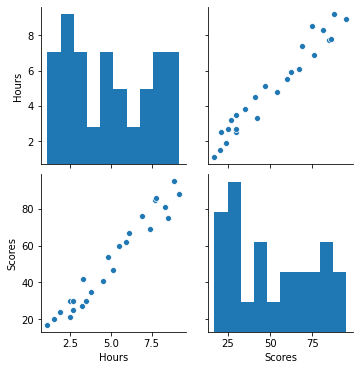

In [38]:
sns.pairplot(df)

#### No skewness is present and hours is linearly correlated with scores

In [39]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Preparing Data 

In [40]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### Train/Test Split

In [41]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Modeling 

#### Using linear regressor

In [42]:
from sklearn.linear_model import LinearRegression  
lr= LinearRegression()  
lr.fit(X_train, y_train) 
ypred=lr.predict(X_test)
print("Training complete.")

Training complete.


# Visualising Trained Model

#### Visualising training set

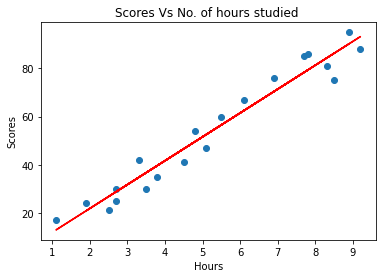

In [48]:
# Plotting for the train data
plt.scatter(X_train,y_train)
plt.title('Scores Vs No. of hours studied ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X_train, lr.predict(X_train),c='r');
plt.show()

#### Visualising testing data

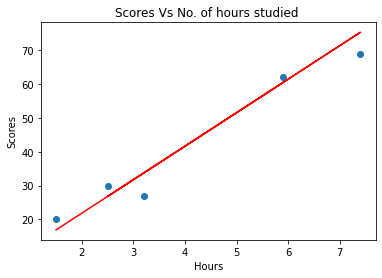

In [49]:
# Plotting for the test data
plt.scatter(X_test, y_test)
plt.title('Scores Vs No. of hours studied ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X_test,ypred,c='r');
plt.show()

# Making predictions

In [68]:
ypred=lr.predict(X_test)
Dict={'Hours':X_test.flatten(),'Actual Score':y_test,'Predicted Score':ypred.flatten()}
print(Dict)
df2=pd.DataFrame(data=Dict)

df2

{'Hours': array([1.5, 3.2, 7.4, 2.5, 5.9]), 'Actual Score': array([20, 27, 69, 30, 62]), 'Predicted Score': array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])}


,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


### Predicting a particular value

In [69]:
# You can also test with your own data
hours = 9.25
own_pred =lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


# Evaluating Model

In [74]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, ypred)) 
print('R2 sqaure :', r2_score(y_test, ypred))

Mean Absolute Error: 4.183859899002982
R2 sqaure : 0.9454906892105354


#### hence we got mean absolute error of 4.18385 from this trained simple regression model